In [137]:
from typing import List
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt

In [151]:
def get_history_data(tickers:List[str], start_date:str, end_date:str):
    print('...Downloading data...')
    print(f'Starting date: {start_date}')
    print(f'Ending date: {end_date}')

    frames = []
    for ticker in tickers:
        tickerData = YahooFinancials(ticker).get_historical_price_data(start_date, end_date, time_interval='daily')
        tickerDf = pd.DataFrame(tickerData[ticker]['prices']).drop('date', axis=1).set_index('formatted_date')
        tickerDf.insert(0, 'ticker', ticker, True)
        tickerDf.to_csv(f'./data/{ticker}.csv')
        frames.append(tickerDf)

    DATA = pd.concat(frames)
    DATA.to_csv('./data/ASSET_DATA.csv')
    return DATA

In [152]:
assets = ['TSLA', 'GME', "AAPL"]
sd = '2014-01-01'
ed = '2016-12-31'
get_history_data(assets, start_date=sd, end_date=ed)

...Downloading data...
Starting date: 2014-01-01
Ending date: 2016-12-31


,ticker,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2014-01-02,TSLA,30.496000,29.309999,29.959999,30.020000,30942000,30.020000
2014-01-03,TSLA,30.438000,29.719999,30.000000,29.912001,23475000,29.912001
2014-01-06,TSLA,30.080000,29.048000,30.000000,29.400000,26805500,29.400000
2014-01-07,TSLA,30.080000,29.049999,29.524000,29.872000,25170500,29.872000
2014-01-08,TSLA,30.740000,29.752001,29.770000,30.256001,30816000,30.256001
...,...,...,...,...,...,...,...
2016-12-23,AAPL,29.129999,28.897499,28.897499,29.129999,56998000,27.459557
2016-12-27,AAPL,29.450001,29.122499,29.129999,29.315001,73187600,27.633940
2016-12-28,AAPL,29.504999,29.049999,29.379999,29.190001,83623600,27.516119


In [157]:
def plot_time_series(symbols: List[str]):
    colors = plt.rcParams["axes.prop_cycle"]()  # get the color cycler
    n_symbols = len(symbols)
    columns = 2
    rows = int(np.ceil(n_symbols / 2))

    DATA = pd.read_csv('./data/ASSET_DATA.csv')

    fig = plt.figure()
    fig.suptitle('close prices ($)')
    for count in range(1, n_symbols+1):
        ticker = symbols[count-1]
        date = DATA['formatted_date'][DATA['ticker']==ticker]
        close = DATA['close'][DATA['ticker']==ticker]
        ax = fig.add_subplot(rows, columns, count)
        ax.set_title(symbols[count-1])

        ax.set_xticks([])

        # Get the next color from the cycler
        c = next(colors)["color"]
        plt.plot(date, close, color=c)
    
    fig.tight_layout()
    fig.savefig('./results/results.pdf')
    fig.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/results.pdf'

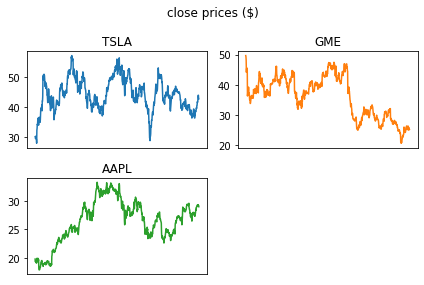

In [158]:
plot_time_series(assets)